<a href="https://colab.research.google.com/github/sobiyeo/General/blob/master/Olufemi_Sobiye_Titanic_LogModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
import warnings

In [90]:
warnings.simplefilter(action='ignore', category=FutureWarning)

Importing Dataset

In [91]:
df = pd.read_csv("/content/Titanic-Dataset.csv")

In [92]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [93]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Information above showed that the "Age" and "Cabin" columns contains NAn values

Moreso, the "Name" column has the names and titles muddled up

In [95]:
#Fixing the names column
df[["Surname", "RestNames"]] = df["Name"].str.split(',', expand=True)

In [96]:
df[["Title", "OtherNames"]] = df["RestNames"].str.split('.', n=1, expand =True)

In [97]:
#dropping "Name", "RestofNames" and "Othernames" columns
df = df.drop(columns=["Name", "RestNames"]);

In [98]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Surname          0
Title            0
OtherNames       0
dtype: int64

In [99]:
#Drop the "Cabin" column
df= df.drop(columns="Cabin");

In [100]:
#impute the NAN values for Age with mean of ages
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
 10  Surname      891 non-null    object 
 11  Title        891 non-null    object 
 12  OtherNames   891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [102]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
Surname        667
Title           17
OtherNames     799
dtype: int64

# Exploratory Data Analysis

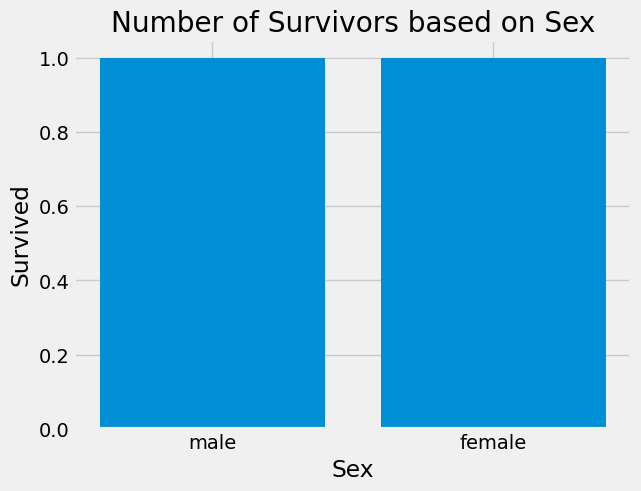

In [103]:
#Number of Survivors based on Sex
plt.bar(df.Sex, df.Survived)
plt.xlabel("Sex")
plt.ylabel("Survived")
plt.title("Number of Survivors based on Sex");

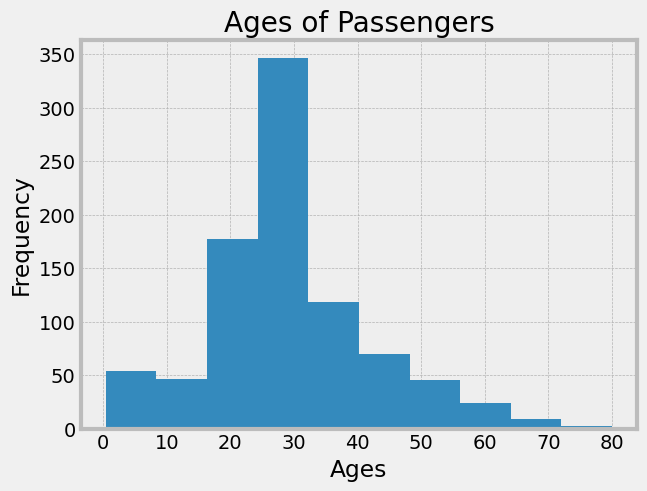

In [104]:
#Distribution of Ages of Passengers
plt.style.use('bmh')
plt.hist(df.Age)
plt.xlabel("Ages")
plt.ylabel("Frequency")
plt.title("Ages of Passengers");


In [105]:
#Age of Male Survivors
male_surv = df[(df['Sex']=='male') & (df['Survived']== 1)]

In [106]:
male_surv['Age'].head()

17    29.699118
21    34.000000
23    28.000000
36    29.699118
55    29.699118
Name: Age, dtype: float64

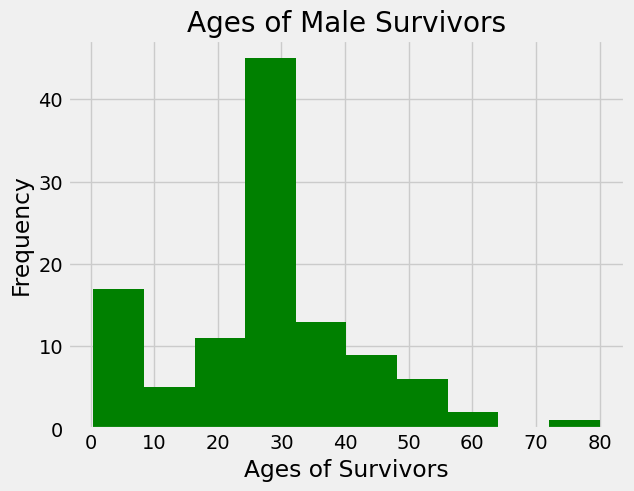

In [107]:
plt.style.use('fivethirtyeight')
plt.hist(male_surv['Age'], color='green')
plt.xlabel("Ages of Survivors")
plt.ylabel("Frequency")
plt.title("Ages of Male Survivors");

In [108]:
# Selecting Numeric only columns to check collinearity
df_num = df.select_dtypes('number')
correlate = df_num.corr()
correlate

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


<Axes: >

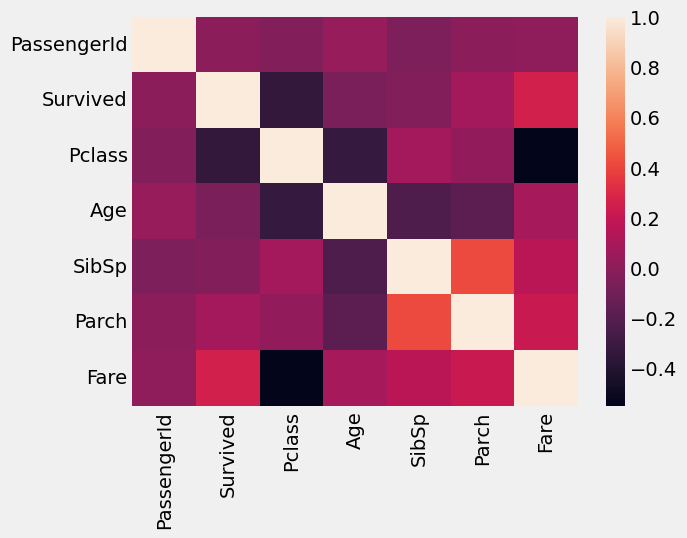

In [109]:
sns.heatmap(correlate)

In [110]:
#Importing Linear Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import numpy as np

In [111]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Surname,Title,OtherNames
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Braund,Mr,Owen Harris
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss,Laina
3,4,1,1,female,35.0,1,0,113803,53.1000,S,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,5,0,3,male,35.0,0,0,373450,8.0500,S,Allen,Mr,William Henry


In [112]:
#Creating Feature Matrix and target vector
X = df.drop(columns=["Survived", "Title", "OtherNames", "Surname", "Ticket", "PassengerId"])
y = df.Survived

In [113]:
#Splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
#splitting training data into folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [115]:
#Instantiating Pipeline
steps = [('encoder', OneHotEncoder(handle_unknown='ignore')), ('model', LogisticRegression())]
pipeline = Pipeline(steps)

In [116]:
LogReg = pipeline.fit(X_train, y_train)

In [117]:
#computing the cross_validation_score for training data
CV_score = cross_val_score(LogReg, X_train, y_train, cv=kf)
print(CV_score)

[0.78321678 0.79020979 0.78169014 0.82394366 0.8028169 ]


In [118]:
#Generatting model predictions
y_pred = LogReg.predict(X_test)

In [119]:
#Generating predictions probabilities
y_pred_proba = LogReg.predict_proba(X_test)
print(y_pred[0])

0


In [120]:
#Generating R-Square score for the model
model_score = LogReg.score(X_test, y_test)
print(model_score)

0.8100558659217877


In [121]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[90 15]
 [19 55]]


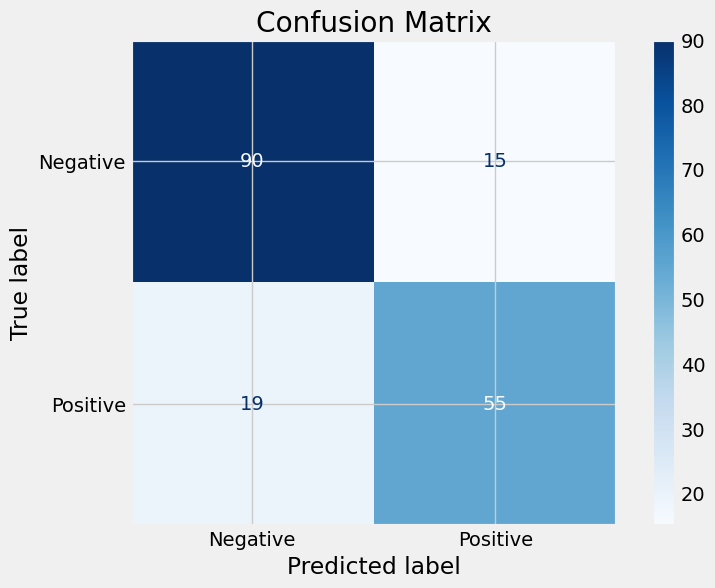

In [122]:
#Genrating Grpahical Display for the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues', xticks_rotation='horizontal')

plt.title('Confusion Matrix')
plt.show()

In [123]:
#Generating a confusion matrix for the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



#Prepared and Trained by Olufemi Sobiye
Thank you.